In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Load dataset
df = pd.read_csv(r'rocket_propulsion_dataset_v1.csv')

In [79]:
df.head()

,fuel_type,oxidizer_type,chamber_pressure_bar,oxidizer_fuel_ratio,combustion_temperature_K,heat_capacity_ratio,nozzle_expansion_ratio,ambient_pressure_bar,specific_impulse_s,combustion_stability_margin,physics_violation_flag
0,NH3,LOX,152.68,0.702,NaN,1.267,64.6,0.01000,307.67,0.064,0
1,NH3,LOX,107.64,0.719,NaN,1.263,133.0,0.01000,303.27,-0.186,0
2,NH3,LOX,99.50,0.724,NaN,1.256,106.3,1.01325,310.10,-0.136,0
3,NH3,LOX,49.67,0.761,NaN,1.273,37.9,1.01325,326.98,-0.283,1
4,NH3,LOX,37.46,1.823,NaN,1.261,30.6,1.01325,324.66,-0.205,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fuel_type                    250000 non-null  object 
 1   oxidizer_type                250000 non-null  object 
 2   chamber_pressure_bar         249892 non-null  float64
 3   oxidizer_fuel_ratio          249894 non-null  float64
 4   combustion_temperature_K     249866 non-null  float64
 5   heat_capacity_ratio          250000 non-null  float64
 6   nozzle_expansion_ratio       250000 non-null  float64
 7   ambient_pressure_bar         250000 non-null  float64
 8   specific_impulse_s           250000 non-null  float64
 9   combustion_stability_margin  250000 non-null  float64
 10  physics_violation_flag       250000 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 21.0+ MB


In [81]:
df.describe()

,chamber_pressure_bar,oxidizer_fuel_ratio,combustion_temperature_K,heat_capacity_ratio,nozzle_expansion_ratio,ambient_pressure_bar,specific_impulse_s,combustion_stability_margin,physics_violation_flag
count,249892.000000,249894.000000,249866.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,135.116835,2.066020,2972.118863,1.237557,77.554406,0.510076,303.529966,-0.071429,0.284596
std,66.425878,1.233407,737.833482,0.032608,41.837632,0.501624,55.121029,0.299488,0.451223
min,20.000000,0.600000,1081.200000,1.161000,5.000000,0.010000,166.650000,-2.129000,0.000000
25%,77.547500,1.000000,2992.900000,1.214000,41.300000,0.010000,302.410000,-0.225000,0.000000
50%,135.380000,1.735000,3243.700000,1.240000,77.550000,0.010000,321.870000,-0.062000,0.000000
75%,192.630000,2.725000,3406.700000,1.254000,113.800000,1.013250,329.040000,0.128000,1.000000
max,250.000000,8.250000,3718.900000,1.320000,150.000000,1.013250,474.250000,0.603000,1.000000


In [82]:
df.corr(numeric_only=True)

,chamber_pressure_bar,oxidizer_fuel_ratio,combustion_temperature_K,heat_capacity_ratio,nozzle_expansion_ratio,ambient_pressure_bar,specific_impulse_s,combustion_stability_margin,physics_violation_flag
chamber_pressure_bar,1.000000,0.001207,0.014406,-0.002261,0.002011,0.000590,0.020602,0.511686,-0.033472
oxidizer_fuel_ratio,0.001207,1.000000,0.306649,-0.308110,-0.000222,-0.001414,0.489180,-0.471915,0.066574
combustion_temperature_K,0.014406,0.306649,1.000000,-0.721913,-0.000996,-0.003516,0.877193,-0.073176,0.334225
heat_capacity_ratio,-0.002261,-0.308110,-0.721913,1.000000,-0.000251,0.001308,-0.792408,0.201356,-0.375644
nozzle_expansion_ratio,0.002011,-0.000222,-0.000996,-0.000251,1.000000,0.002034,-0.047706,0.002031,-0.193795
ambient_pressure_bar,0.000590,-0.001414,-0.003516,0.001308,0.002034,1.000000,-0.001923,0.001516,-0.002157
specific_impulse_s,0.020602,0.489180,0.877193,-0.792408,-0.047706,-0.001923,1.000000,-0.244987,0.322187
combustion_stability_margin,0.511686,-0.471915,-0.073176,0.201356,0.002031,0.001516,-0.244987,1.000000,-0.017973
physics_violation_flag,-0.033472,0.066574,0.334225,-0.375644,-0.193795,-0.002157,0.322187,-0.017973,1.000000


In [83]:
df.isnull().sum()

fuel_type                        0
oxidizer_type                    0
chamber_pressure_bar           108
oxidizer_fuel_ratio            106
combustion_temperature_K       134
heat_capacity_ratio              0
nozzle_expansion_ratio           0
ambient_pressure_bar             0
specific_impulse_s               0
combustion_stability_margin      0
physics_violation_flag           0
dtype: int64

In [84]:
df['chamber_pressure_bar'].fillna(df['chamber_pressure_bar'].mean(), inplace=True)
df['oxidizer_fuel_ratio'].fillna(df['oxidizer_fuel_ratio'].mean(), inplace=True)
df['combustion_temperature_K'].fillna(df['combustion_temperature_K'].mean(), inplace=True)

In [85]:
df.isnull().sum()

fuel_type                      0
oxidizer_type                  0
chamber_pressure_bar           0
oxidizer_fuel_ratio            0
combustion_temperature_K       0
heat_capacity_ratio            0
nozzle_expansion_ratio         0
ambient_pressure_bar           0
specific_impulse_s             0
combustion_stability_margin    0
physics_violation_flag         0
dtype: int64

In [86]:
# EDA

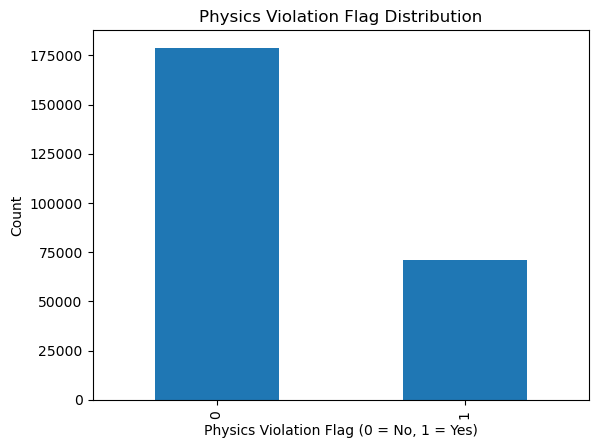

In [87]:
# 1. Target Variable Distribution
# ----------------------------------
plt.figure()
df['physics_violation_flag'].value_counts().sort_index().plot(kind='bar')
plt.title('Physics Violation Flag Distribution')
plt.xlabel('Physics Violation Flag (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [88]:
df_before = df.copy()

In [89]:
num_cols = [
    'chamber_pressure_bar',
    'oxidizer_fuel_ratio',
    'combustion_temperature_K',
    'specific_impulse_s',
    'combustion_stability_margin'
]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


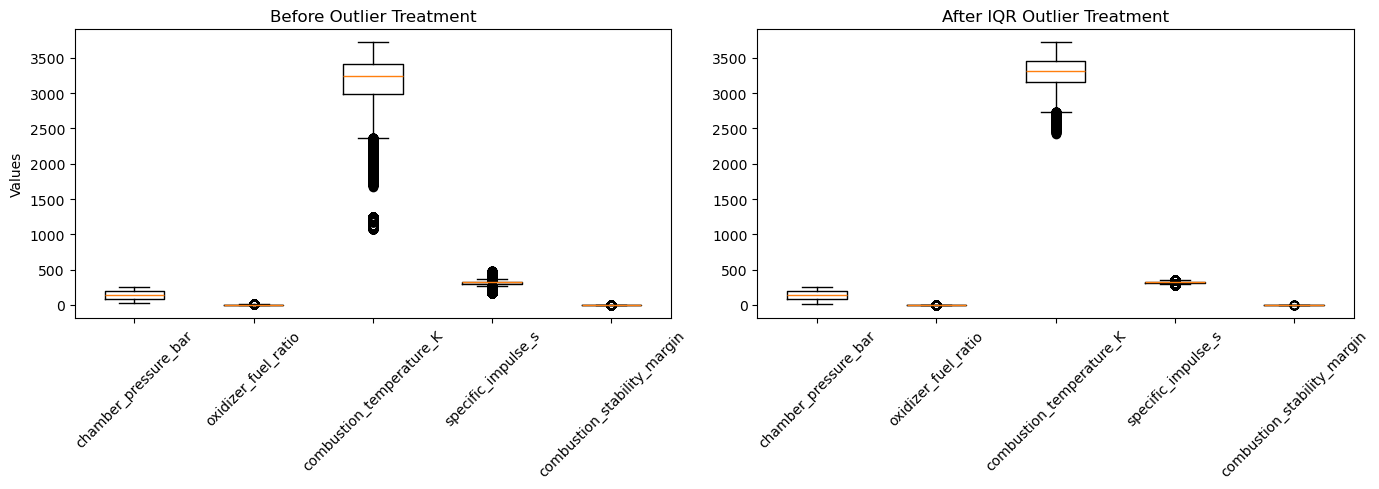

In [90]:
# 2. Boxplot of Key Numerical Features
# ----------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Before
plt.subplot(1, 2, 1)
plt.boxplot(df_before[num_cols], labels=num_cols)
plt.title('Before Outlier Treatment')
plt.xticks(rotation=45)
plt.ylabel('Values')

# After
plt.subplot(1, 2, 2)
plt.boxplot(df[num_cols], labels=num_cols)
plt.title('After IQR Outlier Treatment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [91]:
# Outliers reflect extreme propulsion conditions and potential physics violations; hence, they are retained 
# or capped rather than removed.”

In [94]:
# encoding categorical variable

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
df['fuel_type'].value_counts()

fuel_type
JP10           10666
Aerozine50     10609
UDMH           10490
NH3            10476
Ethane         10459
Syntin         10451
Hydrazine      10441
APCP           10438
HTPB_Hybrid    10424
UH25           10417
PBAN           10365
Ethanol        10341
Paraffin       10281
Methanol       10275
MMH            10219
RP1             8800
CH4             2235
Aniline         1818
Tonka250        1615
Name: count, dtype: int64

In [97]:
df['oxidizer_type'].value_counts()

oxidizer_type
LOX            94408
NTO            55609
Internal_AP    20803
Name: count, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='liblinear'
    ),
    'Decision Tree': DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=10,
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
}


results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
    }

                     Accuracy  Precision    Recall        F1
Logistic Regression  0.927146   0.870914  0.958198  0.912473
Decision Tree        0.965549   0.952559  0.960931  0.956726
Random Forest        0.966573   0.941210  0.976662  0.958608


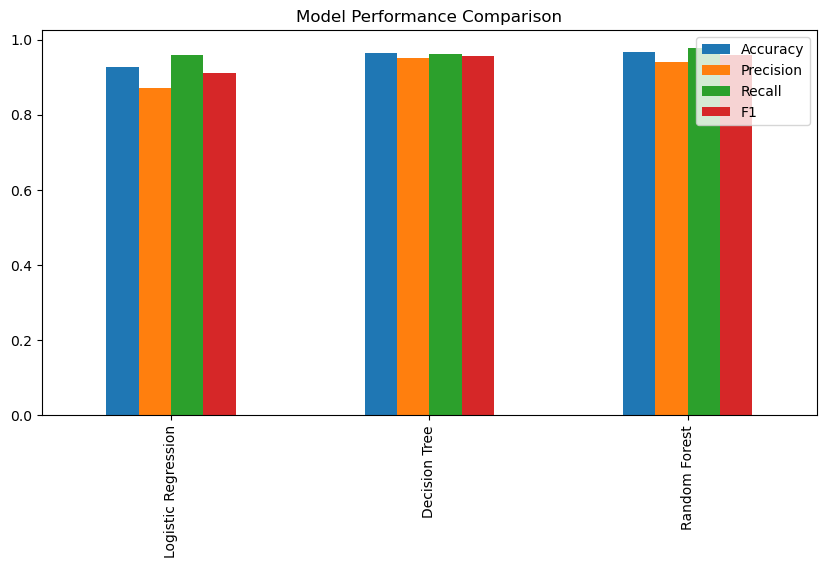

In [101]:
results_df = pd.DataFrame(results).T
print(results_df)
results_df.plot(kind='bar', figsize=(10,5))
plt.title('Model Performance Comparison')
plt.show()

FINAL VERDICT

Random Forest Classifier is selected as the final model
because it achieves the highest recall, minimizing missed physics violations,
while maintaining strong overall performance.

In [102]:
df['physics_violation_flag'].value_counts()

physics_violation_flag
0    103573
1     67247
Name: count, dtype: int64

In [103]:
print("Min :", y_pred.min())
print("Max :", y_pred.max())
print("Mean:", y_pred.mean())

Min : 0
Max : 1
Mean: 0.41125160988174686


In [104]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'class_weight': ['balanced']
}

In [105]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1',n_jobs=-1)

In [106]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [10],
                         'n_estimators': [100]},
             scoring='f1')

In [107]:
best_rf = grid.best_estimator_

print("Best Parameters:")
print(grid.best_params_)

Best Parameters:
{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}


In [108]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     20624
           1       0.92      0.98      0.95     13540

    accuracy                           0.96     34164
   macro avg       0.95      0.96      0.96     34164
weighted avg       0.96      0.96      0.96     34164

[[19489  1135]
 [  331 13209]]


In [109]:
# Save trained model
pickle.dump(best_rf, open('physics_violation_model(212).sav', 'wb'))

# Save feature names (CRITICAL)
pickle.dump(X_encoded.columns.tolist(), open('model_features(212).sav', 'wb'))

In [110]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])